In [1]:
import pandas as pd #import for adding the dataframes we will manipulate.
#this import is the standard when doing the data analysis on data sets
from sklearn.model_selection import train_test_split #for splitting the data set into training and testing data
#Our model will be trained with the training data, and tested with another set of data to see if it is accurate on newly seen data
from sklearn.feature_extraction.text import TfidfVectorizer #for Vectorization of dataset.
#with vectorization we essentially turn the text data of the dataset into numerical data
from sklearn.linear_model import LogisticRegression #prediction model used for this dataset which contains categorical data
#We use regression models to try to describe the relationship of the idependent and dependent variables
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#for measuring statistics for the data
#from these imports we can get the accuracy of the trained model when using test data, as well as more detailed figures
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #for downloading necessary resources
from nltk.corpus import stopwords #Imports for getting the stopwords array. Words commonly filtered out before processing.
import string # Imports for string manipulation.
#We use this import when remove stopwords, lowercase the strings, and remove punctuation.
from textblob import Word # used later for lemmatization
#The Word class has a lot of useful functions for natural language processing.

import numpy as np


nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/balong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/balong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
drugs = pd.read_csv('drugLibTrain_raw.tsv', sep = '\t') #pd.read_csv is used to load the dataframe.
#Since the data is in .tsv format, sep= '\t' is used because the values of a .tsv file is separated by tabs


In [3]:
clean_drugs = drugs.dropna(subset=['sideEffectsReview']) #remove rows with null values in the sideEffectsReview column
#We ignore null data to maintain the quality and minimize errors in our analysis.

In [4]:
def lowercase(x): #function for lowercasing strings.
#here we define the function, you can also use a lambda, but we chose to do this to make it more clear
    x = " ".join(x.lower() for x in x.split()) #line used to lowercase string.
    #the string import provides this functionality, we split the string into individual words, lowercase them
    #and put it back together
    return x #return lowercased string. This will be done for every row

clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].apply(lowercase) #applies the lowercasing function to all strings in the column
#This will be the first of a few preprocessing steps that we will do.

clean_drugs.head() #view first 5 rows from the dataset

/tmp/ipykernel_12991/3511437286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].apply(lowercase) #applies the lowercasing function to all strings in the column


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,i felt extremely drugged and dopey. could not ...,See above


In [5]:
clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].str.replace('[^\w\s]', "", regex = True) #removes punctuation from string
#We use a regex expression to remove any string patterns that match the regex expressions for punctuations
#with an empty string

clean_drugs.head(5) #view first 5 rows from the dataset

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_12991/3123732567.py:1: SyntaxWarning: invalid escape sequence '\w'
  clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].str.replace('[^\w\s]', "", regex = True) #removes punctuation from string
/tmp/ipykernel_12991/3123732567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].str.replace('[^\w\s]', "", regex = True) #removes punctuation from string


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence rena...,"monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,heavy cycle cramps hot flashes fatigue long la...,"I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,heavier bleeding and clotting than normal,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,constipation dry mouth and some mild dizziness...,I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,i felt extremely drugged and dopey could not d...,See above


In [6]:
stop = stopwords.words('english') #Initialize stopwords array.
#the stop variable now contains a list of words to be removed.
def replace_stopwords(x): #function for removing stopword
    #similar to earlier we define it, but you can also do a lambda function
    x = " ".join(x for x in x.split() if x not in stop) #removes stopwords from single string
    #here instead of converting the word like earlier, we just ignore words that are stopwords before joining
    return x #return cleaned string
    #the return string will now not have any stopwords

    
clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].apply(replace_stopwords)  #applies the stopwords removing function to all strings in the column
#Without stopwords, are model can more accurately assign meaning to the words in the model, without
#the problem of noise from the stopwords, which generally don't have meaning in language processing

/tmp/ipykernel_12991/1139616149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].apply(replace_stopwords)  #applies the stopwords removing function to all strings in the column


In [7]:
clean_drugs #view dataset

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence renal ...,"monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,heavy cycle cramps hot flashes fatigue long la...,"I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,heavier bleeding clotting normal,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,constipation dry mouth mild dizziness would go...,I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,felt extremely drugged dopey could drive med a...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...",restless legs night insomnia headache sometime...,"I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,weight gain extreme tiredness day insomnia nig...,I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,constant issues patch staying called manufactu...,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,dizziness fatigue nausea,Started at 2 doses of 300 mg a day and worked ...


In [8]:
def lemmatizedrugs(x): #function for lemmatization
    x = " ".join([Word(word).lemmatize() for word in x.split()]) #lemmatizes or replaces variations of words with its base word
    return x #return lemmatized string

clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].apply(lemmatizedrugs) #lemmatizes the column

/tmp/ipykernel_12991/221413025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_drugs['sideEffectsReview'] = clean_drugs['sideEffectsReview'].apply(lemmatizedrugs) #lemmatizes the column


In [9]:
clean_drugs #view dataset

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence renal ...,"monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,heavy cycle cramp hot flash fatigue long lasti...,"I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,heavier bleeding clotting normal,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,constipation dry mouth mild dizziness would go...,I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,felt extremely drugged dopey could drive med a...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...",restless leg night insomnia headache sometimes...,"I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,weight gain extreme tiredness day insomnia nig...,I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,constant issue patch staying called manufactur...,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,dizziness fatigue nausea,Started at 2 doses of 300 mg a day and worked ...


In [10]:
X = clean_drugs['sideEffectsReview'] #puts the reviews on the x axis
#this represents the Independent variable of the review of itself
y = clean_drugs['sideEffects'] #puts the corresponding side effects category on the y axis
#this repreesents the Dependent Variable of what category of sideEffect is the review

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y) 
#splits the data into training and testing data
#The parameters for splitting are the independent and dependent variables, 20% for the testing data, some random state, and we stratify

In [11]:
X_train.head(10) #view the first 10 training data entries

2148    side effect far slight itch around injectionsi...
1098    sever irritation peeling outerlayer skin redne...
1425    felt like hopped whole time skin would feel cr...
660     ive taken lamictal different combo anticonvuls...
932     increase bloating increased feeling needing ur...
1831     unpleasant side effect estradiol could ascertain
1416                                 side effect remember
55      taking medicaion experience side effect thing ...
2228    initially frist two week medication patient co...
1125    erectile problemssevere anxiety panic attack n...
Name: sideEffectsReview, dtype: object

In [12]:
vectorizer = TfidfVectorizer(lowercase=True, max_df=0.95, min_df=2, ngram_range=(1, 3)) 
#use the TfidVectorizer function to create a vectorizer object
#The parameters for the vectorizer are min and max df which allows us to ignore words that appear too often or too infrequently
#and the ngram range basically tells us to consider both single words, and groups of 3 words at most

X_train_tfidf = vectorizer.fit_transform(X_train)  # calculates the statistics needed, then tranforms the data into numerical value from the statistics for the model to use
#the fitting of the data is essentially the vectorizer building the vocabulary from the data

X_test_tfidf = vectorizer.transform(X_test) # transforms the model, it doesn't need to fit because the statistics are still in the vectorizer
#the transforming essentially turns the words into numbers based on their frequencies or importance

In [13]:
model = LogisticRegression(random_state=42, solver='liblinear')  #Using logistic regression because we wish to analyze categorical data
#We use a set random state so we can get a deterministic result every time we run.
#We specificy liblinear to be the solver, it is a c++ based library for find weights for the model
#usually used for smaller data sets like this

model.fit(X_train_tfidf, y_train) # Here we are training the model
#The model adjusts its weights to better fit the data we are training it with

y_pred = model.predict(X_test_tfidf) #We then make predictions using the test data.
#Here want to see if the model can correctly predict that the category of the sideEffect
#based on newly seen reviews

accuracy = accuracy_score(y_test, y_pred) # Here we evaluate the model on its accuracy
#The accuracy is the percantage of correct predictions on the test data
report = classification_report(y_test, y_pred) # create a report of more details about the model and its predictions
#precision measures correct predictions, recall measures how many were correctly identified, f1-score is the mean
#of precision and recall
#and support shows occurances of each of the categories

print(f"Accuracy: {accuracy:.4f}") # print the accuracy.
#as you can see the model we trained is about 53% accurate
print("Classification Report:\n", report) #print the report
#as you can see the model is ok in some categories, especially with a larger support,
#but because of the lesser amount of data for other categories, some have more or less false positives
#false negatives, as seen with the precision and recall respectively

Accuracy: 0.5354
Classification Report:
                                precision    recall  f1-score   support

Extremely Severe Side Effects       1.00      0.03      0.06        35
            Mild Side Effects       0.48      0.82      0.61       203
        Moderate Side Effects       0.31      0.20      0.24       123
              No Side Effects       0.79      0.71      0.75       172
          Severe Side Effects       0.41      0.15      0.22        74

                     accuracy                           0.54       607
                    macro avg       0.60      0.38      0.37       607
                 weighted avg       0.55      0.54      0.49       607



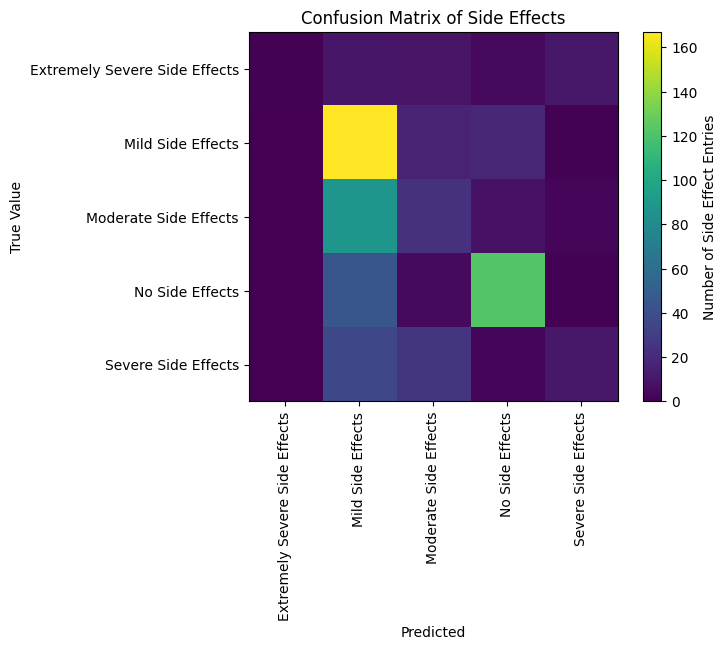

In [14]:
labels =  sorted(list(set(y_test)))
cm = confusion_matrix(y_test,y_pred)
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels)
plt.title('Confusion Matrix of Side Effects')
plt.ylabel('True Value')
plt.xlabel('Predicted')

graph = plt.imshow(cm)
bar=plt.colorbar(graph)
bar.set_label('Number of Side Effect Entries')
plt.show()


## Analysis
As from the plot, the model accurately predicts 'Mild Side Effects' and 'No Side Effects' for the most part. While for the other categories, it did not accurately predict the correct Side Effect Category. The model confuses a significant number of 'Moderate Side Effects' for 'Mild Side Effects' and in general, the model confuses many reviews for 'Mild Side Effects'.

## Interpretations

The model got a total accuracy of 53.54% which means that around half of the test reviews were correctly predicted by the model.

Based on the Classification Report the 'Extremely Severe Side Effects' has a high precision and low recall. It means that for all that it predicted in the sentiment 'Extremely Severe Side Effects', all of it was correct(1.00). However it did not predict all the values of 'Extremely Severe Side Effects' in the data(0.03). This caused the f1 score to be extremely low as the harmonic mean of Precision and recall are combined.

Based on the Classification Report the 'Mild Side Effects' has a low precision and high recall. It means that for all that it predicted in the sentiment 'Mild Side Effects', less than half of it was correct(0.48). However it predicted most values of 'Mild Side Effects' in the data(0.82). This caused the f1 score the be moderately high as the harmonic mean of Precision and recall are combined.

Based on the Classification Report the 'Moderate Side Effects' has a low precision and low recall. It means that for all that it predicted in the sentiment 'Moderate Side Effects', 31% of it was correct. However it did not predict all the values of 'Moderate Side Effects' in the data(0.20). This caused the f1 score the be low as the harmonic mean of Precision and recall are combined.

Based on the Classification Report the 'No Side Effects' has a high precision and high recall. It means that for all the data it predicted in the sentiment 'No Side Effects', 79% of it was correct. It also predicted most values of 'No Side Effects' in the data(0.71). This caused the f1 score the be relatively high as the harmonic mean of Precision and recall are combined.

Based on the Classification Report the 'Severe Side Effects' has a low precision and low recall. It means that for all that it predicted in the sentiment 'Severe Side Effects', 41% of it was correct. However it did not predict all the values of 'Severe Side Effects' in the data(0.15). This caused the f1 score the be low as the harmonic mean of Precision and recall are combined.

A lot of these categories' F1 score were negatively affected by their support with some categories support are very low compared to other categories.


## Strengths And Weaknesses
### Strength
- The model is reliable when predicting 'No Side Effects' and 'Mild Side Effects'. It means that the model understands the language patterns from these sentiments. According to the F1 score, both sentiments also show a fairly balanced performance.

### Weakness
- The model has not predicted certain sentiments well such as 'Extremely Severe Side Effects' and 'Severe Side Effects'. The model for the most part does not accurately predict the sentiment of the reviews other than 'Mild Side Effects' and 'No Side Effects'. 
- The model is biased on the 'Mild Side Effects' as it overly predicts regardless of its category.


## Factors

- The data set only has a relatively low amount of data with only about 3000rows
- From the start, the datas were biased as most of their sentiment were 'Mild Side Effects' and very little of the more severe side effects
- There are 5 sentiments in the dataset which distributes more of the data points among different categories which may cause the model to have a harder time in seeing patterns in the data.
  

## Improvements 

- Preprocess the data into unbiased by balancing the amount of data per category manually i.e. resample the data
- Find a new dataset with a large amount of rows and unbiased sentiments

## Refernces
model.fit() in TensorFlow
By GeeksforGeeks: GeeksforGeeksYear: 2025URL: https://www.geeksforgeeks.org/model-fit-in-tensorflow/

Stack Overflow
By Anonymous: Stack OverflowYear: 2014URL: https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer

TfidfVectorizer
By Anonymous: scikit-learnYear: 2025URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

train_test_split
By Anonymous: scikit-learnYear: 2025URL: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



Tutorial: Quickstart — TextBlob 0.19.0 documentation
    By Anonymous: Readthedocs.ioYear: 2025URL: https://textblob.readthedocs.io/en/dev/quickstart.html


